<a href="https://colab.research.google.com/github/ivansoriasolis/ia/blob/master/Capitulo_1_El_panorama_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo

Cargamos los datos de GDP per capita

In [63]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/ivansoriasolis/ia/master/01/gdp_per_capita.csv", "gdp_per_capita.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ivansoriasolis/ia/master/01/oecd_bli_2015.csv", "oecd_bli_2015.csv")

('oecd_bli_2015.csv', <http.client.HTTPMessage at 0x7f102a48a5d0>)

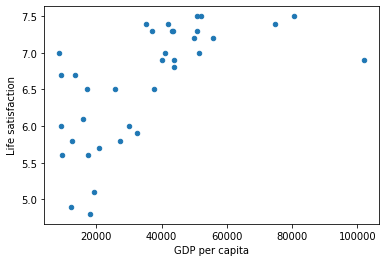

[[6.28653637]]


In [88]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 28 18:28:38 2022

@author: IVAN
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Cargando la data data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    ''' Acomoda los datos para preparar el conjunto de entrenamiento  '''
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']]#.iloc[keep_indices]

# Preparando los datos
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualizando la data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Seleccionar un modelo lineal
model = sklearn.linear_model.LinearRegression()

# Entrenando el modelo
model.fit(X, y)

# Haciendo una predicción para Chipre
X_new = [[22587]]  # GDP de Chipre
print(model.predict(X_new)) # salida [[ 5.96242338]]

Haga una predicción para Eslovenia (GDP = $20,732)

In [66]:
# Haciendo una predicción para Eslovenia
X_new = [[20732]]  # GDP de Eslovenia
print(model.predict(X_new)) # salida [[ 5.87131422]]

[[6.24354241]]


Reemplazando la regresión lineal por k-nearest neigbors

In [67]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Entrenando el modelo
model1.fit(X,y)

# Haciendo una predicción para Chipre
X_new = [[20732]]  # GDP de Chipre
print(model1.predict(X_new)) # salida [[5.2]]

[[5.2]]
